<a href="https://colab.research.google.com/github/jonkingseestheworld/raster_visualization/blob/main/WP_SouthSudan_popu_change_by_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## pip install GIS packages

!pip install rasterio
!pip install geopandas


In [ ]:
## import required packages
import rasterio
from rasterio import mask
import matplotlib.pyplot as plt
#import matplotlib as mlp
import re
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd

import os

In [ ]:
## to mount google drive so that files can be automatically retrieved and saved there 
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
## change WD to the folder where I save the data/files in my google drive
os.chdir("gdrive/MyDrive/Colab Notebooks/satellite_analysis")

## (Only one-time code) Downloading Worldpop data 
(Doesn't save into my gdrive)

In [ ]:
### wget package does not exist in google colab
#!pip install wget

import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=d2b400e872edb760aa22a6b0f4465e1e3ec9bfc4b11851fd13c23ea2407cbb31
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
### The code here is written for downloading data of a country from all years in a loop
### You can modify it to enable downloading for multiple countries in a go

country = "SSD"   ### update it to the country abbreviation needed

### create/specify the destination path where downloaded files are saved

#parent_dir = "/content/gdrive/MyDrive/Colab Notebooks/satellite_analysis/data/worldpop"
parent_dir = "/content"     # these files occupied too much of my gdrive. I cannot save them in my gdrive anymore

dest_path = os.path.join(parent_dir, "worldpop", country)
os.makedirs(dest_path, exist_ok=True) 


### Worldpop population data can be downloaded from their 'ftp' repo folder directly

for year in range(2000,2021):    # here to get data from year 2000 to 2020
  url = "ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020/%s/%s/%s_ppp_%s.tif" %(year, country, country, year)
  wget.download(url, dest_path)


# !wget ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020/2020/EGY/egy_ppp_2020.tif


## Functions: Plotting raster images


In [ ]:
## function for reading a raster image (.tiff)
def read_raster(tiff):
  img = rasterio.open(tiff)
  rast_data = img.read(1)
  rast_data[rast_data<0] = -1

  rast_pop_count = rast_data[rast_data > 0].sum()
  return(rast_data, img, rast_pop_count)


## basic function for plotting a raster (.tiff) image
def plot_raster(rast_data, title='', figsize=(10,10), options = "not_save", filename=''):

  fig, ax = plt.subplots(figsize = figsize)
  #plt.figure(figsize = figsize)
  
  im1 = ax.imshow(np.log10(rast_data +1), vmin=0, vmax=1.2)
  fig.suptitle("{}: {}".format(title, rast_data[rast_data >0].sum()), fontsize = 20)  

  ax.axis('off')
  fig.colorbar(im1, fraction=0.03)

  if options is "save":
    plt.savefig(filename)
    plt.close() 



#### (?!One off code) Saving raster images[link text](https://) as png

In [ ]:
years = range(2013, 2020)

for year in years:

  img = '/content/worldpop/SSD/SSD_ppp_{}.tif'.format(year)    #'data/worldpop/uga_ppp_2010.tif'

  rast_data, img, pop_count = read_raster(img)

  print(rast_data.shape) #, np.unique(rast_data, return_counts=True)

  title = 'Est Population ({}) in South Sudan'.format(year)
  #filename = 'data/SSD_pop_{}.png'.format(year)

  plot_raster(rast_data, title=title, options="not_save") #, filename=filename)
  ## to save the image as a png, specify options = "save" and provide a string filename


#### (?!One off code) Saving all png images as a gif

In [ ]:
from PIL import Image
import glob

In [ ]:
#Create the frames
frames=[]
#imgs = glob.glob("data/pop_png/SSD/*.png")

years = [[2000], list(range(2005,2021))]
years = [yr for sublist in years for yr in sublist]

for yr in years:
  img = 'data/pop_png/SSD/SSD_pop_{}.png'.format(yr)   # may need to update this dir
  new_frame=Image.open(img)
  frames.append(new_frame)

#Saving into a GIF file that loops forever
frames[0].save('data/pop_png/SSD_pop_2000,2015-2021.gif.png', format='GIF',     # may need to update this dir
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

## Displaying the gif (population distribution over the years)

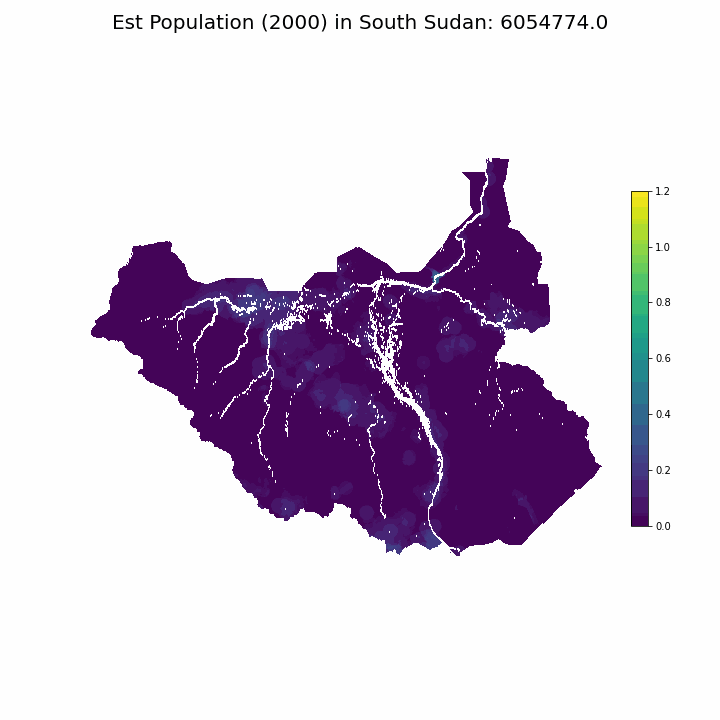

In [ ]:
from IPython.display import Image
Image(filename="data/pop_png/SSD_pop_2000,2015-2021.gif.png")   
#in order for the Image function to work; the file needs to end with .png as extension 

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets
from skimage import io

#yrs = [[2005], list(range(2010,2021))]
#yrs = [yr for sublist in yrs for yr in sublist]
yrs = [2005, 2010, 2015, 2020]

# interactive plots using widgets
def scroll_images(years):
  n = len(years)
  def view_image(ii):
    img_file = "data/pop_png/SSD/SSD_pop_{}.png".format(years[ii])
    img = plt.imread(img_file)

    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='bilinear')
    ax.axis("off")
  
  interact(view_image, ii=widgets.IntSlider(min=0, max=n-1, value=0))



In [ ]:
scroll_images(yrs)

interactive(children=(IntSlider(value=0, description='ii', max=3), Output()), _dom_classes=('widget-interact',…

# Visualising population distribution across South Sudan


In [ ]:
year = 2020
img = '/content/worldpop/SSD/SSD_ppp_{}.tif'.format(year)    #'data/worldpop/uga_ppp_2020.tif'

rast_data, rast_img, pop_count = read_raster(img)

print(rast_data.shape) 
print(pop_count)

(10486, 13400)
16767092.0


In [ ]:
np.unique(rast_data, return_counts=True)

(array([-1.0000000e+00,  3.2780615e-03,  3.2851466e-03, ...,
         9.3908777e+00,  9.4175377e+00,  9.4310436e+00], dtype=float32),
 array([67265193,        1,        1, ...,        1,        1,        1]))

In [ ]:
title = 'Est Population ({}) in South Sudan'.format(year)

plot_raster(rast_data, title)

In [ ]:
country = "SSD"
pop_list = []

years = [list(range(2000,2021))]
years = [yr for sublist in years for yr in sublist]

for yr in years:
  img = '/content/worldpop/SSD/SSD_ppp_{}.tif'.format(yr)
  rast_data, rast_img, popcount = read_raster(img)
  yearlypop = {'year': yr, 'country': country, 'tot count': popcount}

  pop_list.append(yearlypop)


In [ ]:
pop_df = pd.DataFrame(pop_list)
pop_df

In [ ]:
country_pop = pop_df.copy(deep=True)
country_pop = country_pop.drop('country', axis=1).set_index('year')
country_pop.head()

,tot count
year,
2000,6054774.0
2001,6262840.0
2002,6484555.0
2003,6721449.5
2004,6975359.0


Text(0.5, 1.0, 'South Sudan: Population Change Rate')

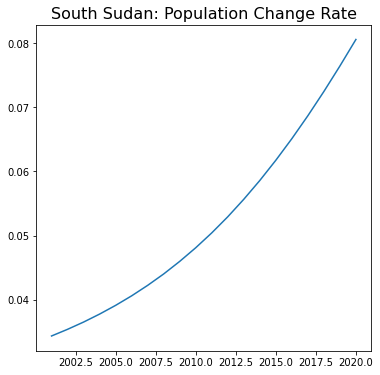

In [ ]:
_pct_chg = country_pop.pct_change(periods=1)

plt.figure(figsize=(6,6))
plt.plot(_pct_chg['tot count'])
        
plt.title('South Sudan: Population Change Rate', fontsize = 16)


Text(0.5, 0.98, 'South Sudan: Population Count')

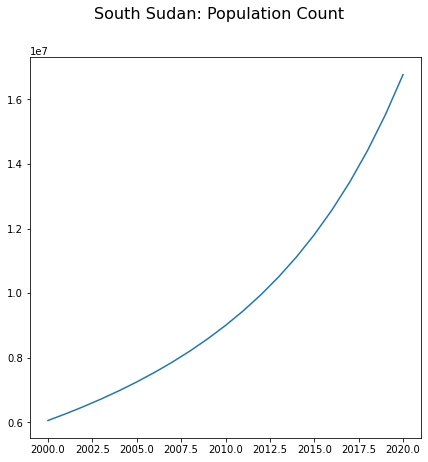

In [ ]:

_count_change = country_pop.copy(deep=True)

plt.figure(figsize=(7,7))
plt.plot(_count_change['tot count'])
        
plt.suptitle('South Sudan: Population Count', fontsize = 16)


# Viewing shapefiles (province level)
An introduction of shapefile and other geospatial polygons can be found here: https://medium.com/locale-ai/getting-started-in-the-geospatial-world-c568baf2ae0b

The shapefiles used in the sections below are downloaded from this website: https://gadm.org/maps.html
* _0.shp (country level)
* _1.shp (province level?)
* _2.shp (city level?)
* _3.shp (subregions of a city, if present)

In [ ]:
shpfile = "data/shpfiles/%s/gadm36_%s_2.shp" %(country, country)
provin = gpd.GeoDataFrame.from_file(shpfile) ## .shp file on province level 
provin.shape


(45, 14)

In [ ]:
provin.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.1_1,Bahr al Jabal,None,None,District,District,None,None,"POLYGON ((32.21575 4.59746, 32.17772 4.55581, ..."
1,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.2_1,Kajo Kaii,None,None,District,District,None,None,"POLYGON ((31.59829 3.68959, 31.59059 3.68719, ..."
2,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.3_1,Nahr Yei,None,None,District,District,None,None,"POLYGON ((30.78127 4.61711, 30.87832 4.53042, ..."
3,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.4_1,Terkaka,None,None,District,District,None,None,"POLYGON ((30.98697 5.40189, 30.99604 5.56315, ..."
4,SSD,South Sudan,SSD.2_1,Eastern Equatoria,None,SSD.2.1_1,Amatonge,None,None,District,District,None,None,"POLYGON ((33.45081 3.75725, 33.32748 3.76716, ..."


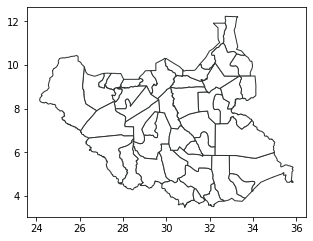

In [ ]:
plt.rcParams['figure.figsize'] = 5,5
provin.plot(color="white", edgecolor="#2e3131")

In [ ]:
provin_df = provin.copy(deep=True)

years = range(2000,2021)
#years = [yr for sublist in years for yr in sublist]

for yr in years:
  img = '/content/worldpop/SSD/SSD_ppp_{}.tif'.format(yr)
  rast_data, rast_img, popcount = read_raster(img)

  _count = []
  for dist in provin_df["NAME_2"]:
    roi = provin_df[provin_df.NAME_2 == dist]

    gtraster, bound = mask.mask(rast_img, roi["geometry"], crop=True)

    # values greater than 0 represent the estimated population count for that pixel
    _count.append(gtraster[0][gtraster[0]>0].sum())

  provin_df[yr] = _count



In [ ]:
provin_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.1_1,Bahr al Jabal,None,None,District,District,None,None,"POLYGON ((32.21575 4.59746, 32.17772 4.55581, ...",249357.671875,259615.468750,272801.593750,283256.281250,294165.718750,307977.406250,323059.781250,338474.156250,353184.875000,371125.687500,389184.531250,407976.562500,439006.06250,458942.96875,482275.906250,508264.468750,5.335138e+05,5.624026e+05,5.876351e+05,6.192347e+05,6.495741e+05
1,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.2_1,Kajo Kaii,None,None,District,District,None,None,"POLYGON ((31.59829 3.68959, 31.59059 3.68719, ...",116996.289062,125361.820312,129803.554688,135876.093750,141491.859375,149521.687500,156835.593750,163439.609375,171789.234375,179108.453125,186491.000000,195303.125000,200938.00000,209735.90625,221467.250000,231365.921875,2.397998e+05,2.486394e+05,2.591003e+05,2.708164e+05,2.817315e+05
2,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.3_1,Nahr Yei,None,None,District,District,None,None,"POLYGON ((30.78127 4.61711, 30.87832 4.53042, ...",298895.562500,310915.656250,325358.375000,340858.812500,359625.656250,374415.375000,389899.437500,408273.843750,427180.625000,446856.437500,466804.375000,488059.468750,507547.78125,531696.93750,552703.187500,575793.250000,6.038951e+05,6.310765e+05,6.623871e+05,6.907288e+05,7.235084e+05
3,SSD,South Sudan,SSD.1_1,Central Equatoria,None,SSD.1.4_1,Terkaka,None,None,District,District,None,None,"POLYGON ((30.98697 5.40189, 30.99604 5.56315, ...",109734.882812,114380.328125,119136.765625,125877.046875,130918.953125,136762.953125,142892.734375,149055.218750,155443.687500,161774.281250,169381.828125,176386.453125,179924.43750,188222.84375,196375.078125,204962.843750,2.137295e+05,2.229767e+05,2.332924e+05,2.433535e+05,2.543587e+05
4,SSD,South Sudan,SSD.2_1,Eastern Equatoria,None,SSD.2.1_1,Amatonge,None,None,District,District,None,None,"POLYGON ((33.45081 3.75725, 33.32748 3.76716, ...",78731.976562,91881.226562,108708.398438,127154.078125,149188.859375,174091.796875,203476.703125,239701.593750,282940.968750,331737.093750,388605.437500,457741.437500,536521.50000,631422.81250,743162.125000,874610.250000,1.027380e+06,1.206652e+06,1.420011e+06,1.667168e+06,1.962928e+06


In [ ]:
fname = "data/%s_popcount_by_dist.pkl" %(country) 
provin_df.to_pickle(fname)


In [ ]:
_ssudan = provin_df.copy(deep=True)
_ssudan = _ssudan[['NAME_1', 'NAME_2'] + list(range(2000,2021))]


In [ ]:
_ssudan = _ssudan.set_index(['NAME_1', 'NAME_2']).T


In [ ]:
_ssudan.head()

NAME_1 Central Equatoria                 ... West Equatoria               
NAME_2     Bahr al Jabal      Kajo Kaii  ...        Tombura         Yambio
2000       249357.671875  116996.289062  ...  108423.000000  154038.875000
2001       259615.468750  125361.820312  ...  114937.101562  159059.156250
2002       272801.593750  129803.554688  ...  118372.343750  165650.671875
2003       283256.281250  135876.093750  ...  122466.132812  172257.640625
2004       294165.718750  141491.859375  ...  127078.695312  177161.921875

[5 rows x 45 columns]

In [ ]:
provin_df['NAME_1'].unique(), len(provin_df['NAME_1'].unique())

(array(['Central Equatoria', 'Eastern Equatoria', 'Jungoli', 'Lakes',
        'North Bahr-al-Ghazal', 'Unity', 'Upper Nile', 'Warap',
        'West Bahr-al-Ghazal', 'West Equatoria'], dtype=object), 10)

Text(0.5, 0.98, 'South Sudan: Province -- District Population Count')

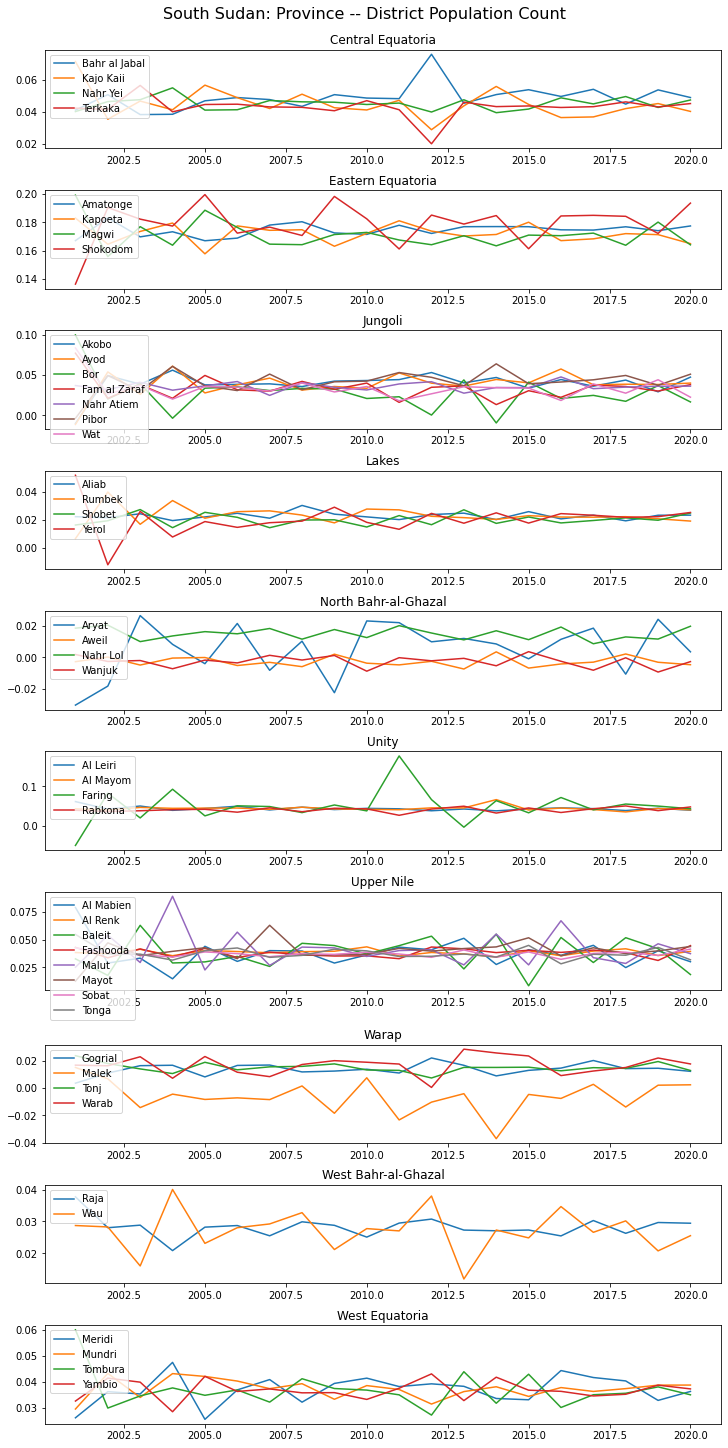

In [ ]:
_pct_change = _ssudan.pct_change(periods=1)

_first_level = provin_df['NAME_1'].unique()
ndist = len(provin_df['NAME_1'].unique())

fig, ax = plt.subplots(figsize=(10,20), nrows=ndist, ncols = 1, constrained_layout = True)

for i, first in enumerate(_first_level):
    for second in _pct_change[(first,)].columns:
        ax[i].plot(_pct_change[(first, second)], label = second)
        
    ax[i].set_title(first)
    ax[i].legend(loc = 'upper left')
    #ax[i].set_ylim(-0.1, 0.15)
#     plt.show();
plt.suptitle('South Sudan: Province -- District Population Count', fontsize = 16)
# plt.savefig('rwanda_district_pct')

Text(0.5, 0.98, 'South Sudan: Province -- District Population Count')

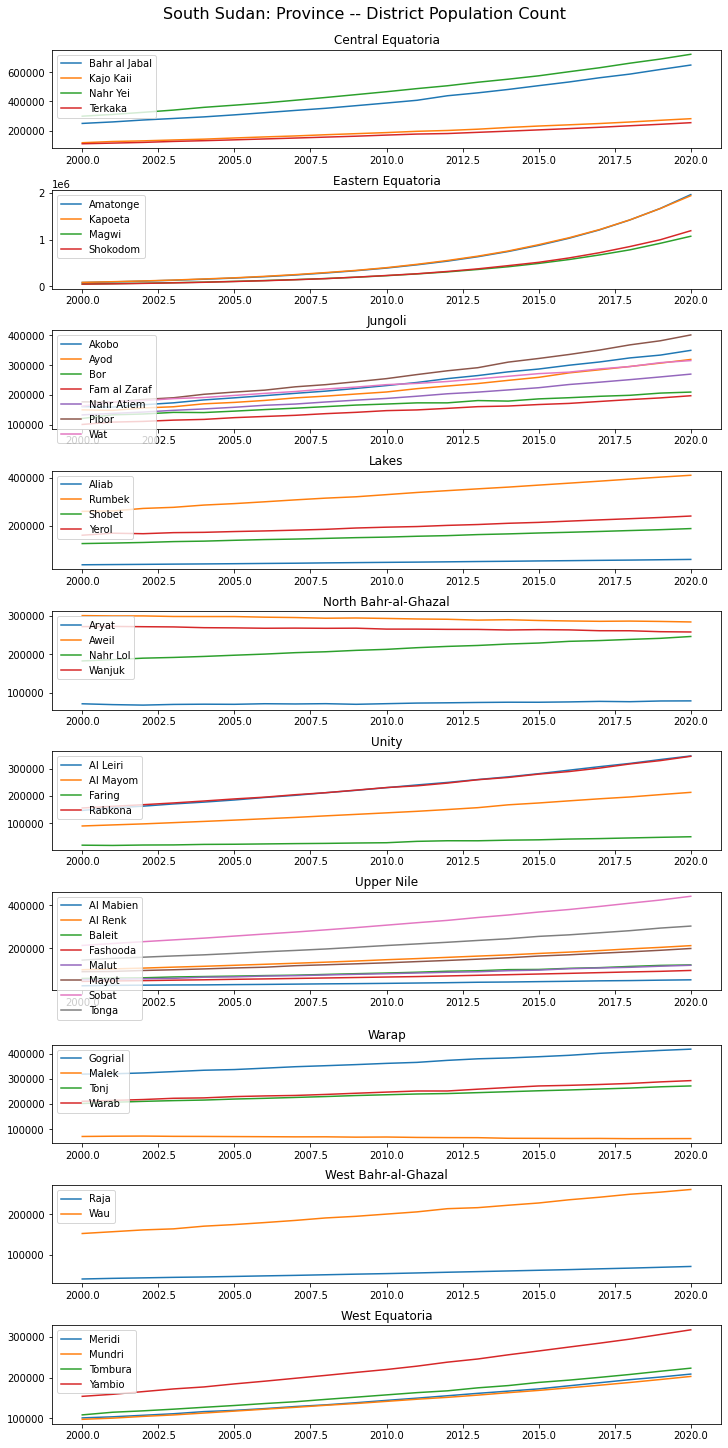

In [ ]:

_count_change = _ssudan.copy(deep=True)
_first_level = provin_df['NAME_1'].unique()
ndist = len(provin_df['NAME_1'].unique())

fig, ax = plt.subplots(figsize = (10,20), nrows = ndist, ncols = 1, constrained_layout = True)

for i, first in enumerate(_first_level):
    for second in _count_change[(first,)].columns:
        ax[i].plot(_count_change[(first, second)], label = second)
        
    ax[i].set_title(first)
    ax[i].legend(loc = 'upper left')
    #ax[i].set_ylim(200_000, 1_000_000)
#     plt.show();
plt.suptitle('South Sudan: Province -- District Population Count', fontsize = 16)
# plt.savefig('rwanda_district_count')